In [ ]:
pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt




In [ ]:
# -----------------------------
# 1. Fetch Ionosphere dataset
# -----------------------------
ionosphere = fetch_ucirepo(id=52)
X = ionosphere.data.features
y = ionosphere.data.targets  # Not used for reconstruction

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [ ]:
# -----------------------------
# 2. Autoencoder architecture
# -----------------------------
input_dim = X_train.shape[1]
encoding_dim = 16  # Single hidden layer size

def build_autoencoder(input_dim, encoding_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
    decoded = layers.Dense(input_dim, activation='linear')(encoded)
    autoencoder = models.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [ ]:
# -----------------------------
# 3. Case (a): No noise, no regularization
# -----------------------------
autoencoder_a = build_autoencoder(input_dim, encoding_dim)
history_a = autoencoder_a.fit(X_train, X_train,
                              epochs=50,
                              batch_size=32,
                              shuffle=True,
                              validation_data=(X_test, X_test),
                              verbose=0)

# Reconstruction error for case (a)
recon_a = autoencoder_a.predict(X_test)
mse_a = np.mean(np.square(X_test - recon_a))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:

# -----------------------------
# 4. Case (b): Added Gaussian noise, no regularization
# -----------------------------
noise_factor = 0.1
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

autoencoder_b = build_autoencoder(input_dim, encoding_dim)
history_b = autoencoder_b.fit(X_train_noisy, X_train,
                              epochs=50,
                              batch_size=32,
                              shuffle=True,
                              validation_data=(X_test_noisy, X_test),
                              verbose=0)

# Reconstruction error for case (b)
recon_b = autoencoder_b.predict(X_test_noisy)
mse_b = np.mean(np.square(X_test - recon_b))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
# -----------------------------
# 5. Report results
# -----------------------------
print(f"Reconstruction MSE (Case a - No Noise): {mse_a:.4f}")
print(f"Reconstruction MSE (Case b - Gaussian Noise): {mse_b:.4f}")


Reconstruction MSE (Case a - No Noise): 0.4543
Reconstruction MSE (Case b - Gaussian Noise): 0.4425


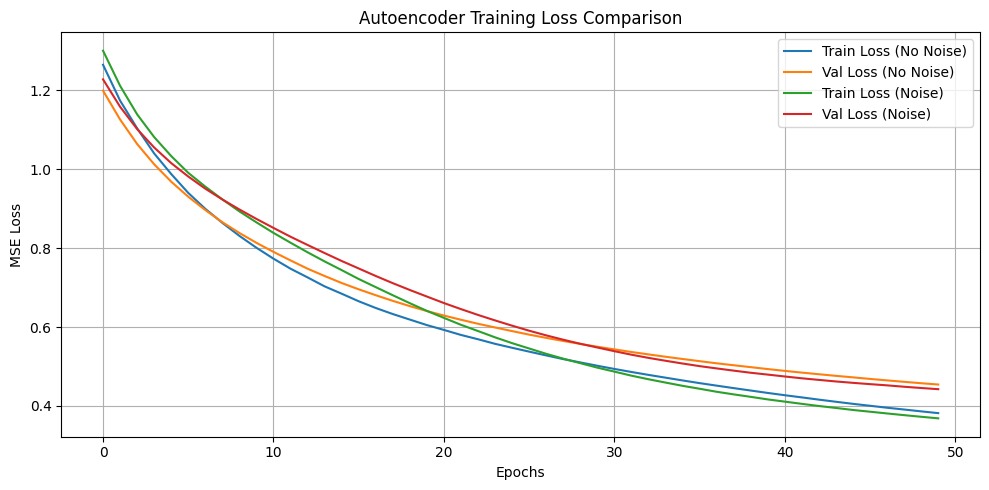

In [ ]:
# -----------------------------
# 6. Visualization
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['loss'], label='Train Loss (No Noise)')
plt.plot(history_a.history['val_loss'], label='Val Loss (No Noise)')
plt.plot(history_b.history['loss'], label='Train Loss (Noise)')
plt.plot(history_b.history['val_loss'], label='Val Loss (Noise)')
plt.title('Autoencoder Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
